In [1]:
%matplotlib inline

import sys
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt, rc
from datetime import datetime, timedelta

sys.path.append('/home/jvalenti/MOAD/analysis-jose/Source')
from OP_functions import *
sys.path.append('/home/jvalenti/MOAD/SalishSeaTools')
from salishsea_tools import evaltools as et

fatal: not a git repository (or any parent up to mount point /)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).


In [2]:
# Define paths
local = 0 #Set to 0 when working on server
paths = path(local)
coords = xr.open_dataset(paths['coords'], decode_times=False)
mask = xr.open_dataset(paths['mask'])

In [3]:
df2=pd.read_csv('/home/jvalenti/MOAD/analysis-jose/OParcels/Results/timeg_2015t.csv', index_col=[0])

meantime2 = df2.groupby(by='DeployT').mean()
SD2 = df2.groupby(by='DeployT').sem()
meantime2.Timeg = meantime2.Timeg/24
SD2.Timeg = (SD2.Timeg/24)

In [4]:
df=pd.read_csv('/home/jvalenti/MOAD/analysis-jose/OParcels/Results/timeg_2016.csv', index_col=[0])

meantime = df.groupby(by='DeployT').mean()
SD = df.groupby(by='DeployT').sem()
meantime.Timeg = meantime.Timeg/24
SD.Timeg = (SD.Timeg/24)

In [5]:
df3=pd.read_csv('/home/jvalenti/MOAD/analysis-jose/OParcels/Results/timeg_2015d.csv', index_col=[0],parse_dates=['DeployT','Timeg'])
df4=pd.read_csv('/home/jvalenti/MOAD/analysis-jose/OParcels/Results/timeg_2016d.csv', index_col=[0],parse_dates=['DeployT','Timeg'])
#frames = [df3,df4]
#result = pd.concat(frames)

In [6]:
start = datetime(2014,12,25)
Fraser_week = [] 
for i in range(104):
    Fraser_week.append(0)
    for j in range(168):
        Fraser_week[-1] += float(xr.open_dataset(get_Fraser_path(start+ timedelta(days= i*7,hours=j))).rorunoff[0,500,394].values)*211.8116*3600 #m3/h

Text(0, 0.5, 'Fraser river weekly discharge ($m^3$)')

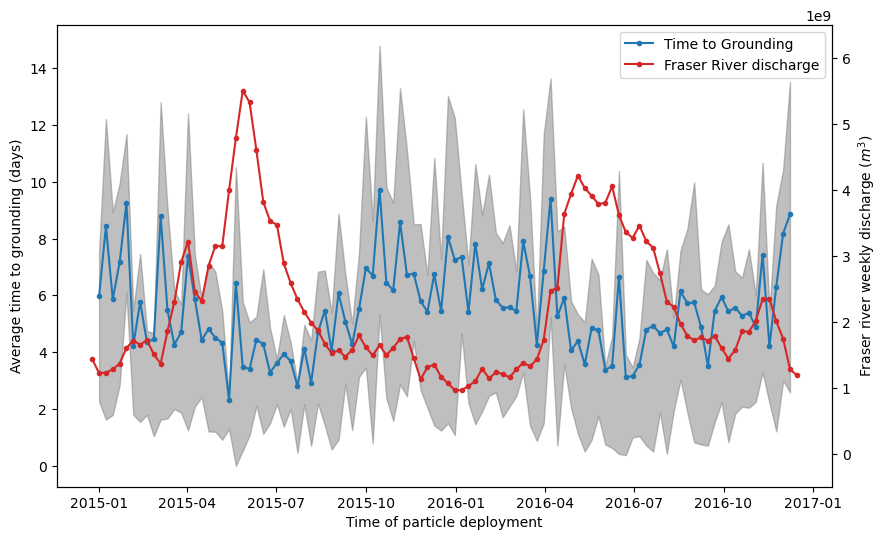

In [7]:
df3['ttg']=(df3.Timeg-df3.DeployT)/ np.timedelta64(1, 'D')
month_mean1 = np.array(df3.groupby(df3['DeployT'].dt.isocalendar().week)['ttg'].mean())
month_Q11 = np.array(df3.groupby(df3['DeployT'].dt.isocalendar().week)['ttg'].quantile(0.25))
month_Q31 = np.array(df3.groupby(df3['DeployT'].dt.isocalendar().week)['ttg'].quantile(0.75))

df4['ttg']=(df4.Timeg-df4.DeployT)/ np.timedelta64(1, 'D')
month_mean2 = np.array(df4.groupby(df4['DeployT'].dt.isocalendar().week)['ttg'].mean())
month_Q12 = np.array(df4.groupby(df4['DeployT'].dt.isocalendar().week)['ttg'].quantile(0.25))
month_Q32 = np.array(df4.groupby(df4['DeployT'].dt.isocalendar().week)['ttg'].quantile(0.75))

month_mean = np.append(month_mean1,month_mean2)
Q1 = np.append(month_Q11,month_Q12)
Q3 = np.append(month_Q31,month_Q32)

xx = []
start = datetime(2014,12,25)
for i in range(104):
    xx.append(start+ timedelta(days= i*7))
xx = np.array(xx, dtype='datetime64')

fig,ax = plt.subplots(1,1,figsize=(10,6))

Twin1 = ax.twinx()
p1 =ax.plot(xx[1:-1],month_mean,'.-',label = 'Time to Grounding')
p2 =ax.fill_between(xx[1:-1],Q1,Q3,color = 'grey',alpha=0.5)
p3 = Twin1.plot(xx,Fraser_week,'.-',c='tab:red',label = 'Fraser River discharge')
Twin1.set_ylim([-5e8,6.5e9])
AX1 = p1+p3
labs = [l.get_label() for l in AX1]
ax.legend(AX1,labs)

ax.set_xlabel('Time of particle deployment')
ax.set_ylabel('Average time to grounding (days)')
Twin1.set_ylabel('Fraser river weekly discharge ($m^3$)')

In [8]:
from dateutil.relativedelta import relativedelta

In [9]:
date_i = datetime(2015,1,1)
Fraser_month = [] 
for i in range(24):
    Fraser_month.append(0)
    date_fin = date_i + relativedelta(months=1)
    while date_i < date_fin:
        Fraser_month[-1] += float(xr.open_dataset(get_Fraser_path(date_i + timedelta(hours=1))).rorunoff[0,500,394].values)*211.8116*3600 #m3/h
        date_i += timedelta(hours=1)

In [23]:
month_Q31

array([10.625     ,  5.70833333,  9.        ,  7.33333333,  6.20833333,
        5.33333333,  4.58333333,  6.08333333,  7.45833333, 10.91666667,
        9.83333333,  9.54166667])

In [24]:
( 9.88541667+8.66666667+8+9.83333333+9.54166667)/5

9.185416667999998

Text(0, 0.5, 'Fraser river weekly discharge ($m^3$)')

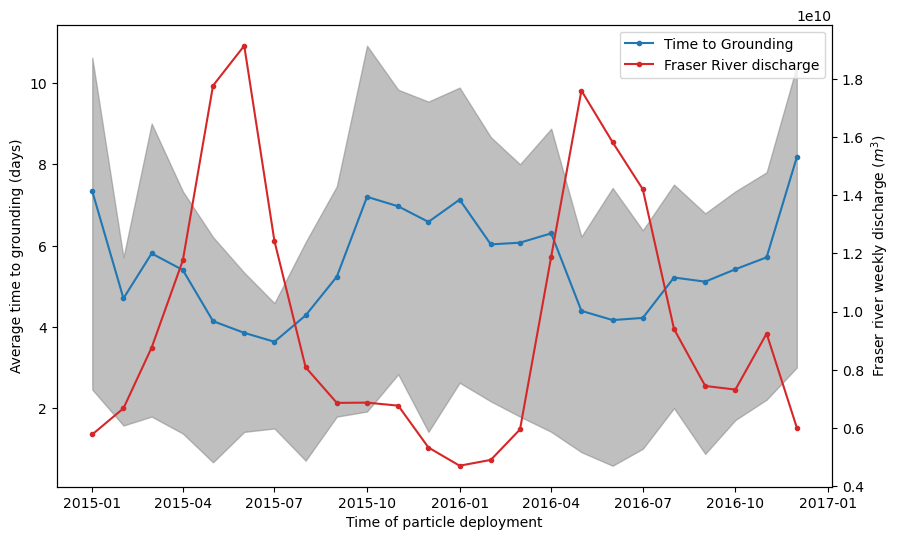

In [11]:
df3['ttg']=(df3.Timeg-df3.DeployT)/ np.timedelta64(1, 'D')
month_mean1 = np.array(df3.groupby(df3['DeployT'].dt.month)['ttg'].mean())
month_Q11 = np.array(df3.groupby(df3['DeployT'].dt.month)['ttg'].quantile(0.25))
month_Q31 = np.array(df3.groupby(df3['DeployT'].dt.month)['ttg'].quantile(0.75))

df4['ttg']=(df4.Timeg-df4.DeployT)/ np.timedelta64(1, 'D')
month_mean2 = np.array(df4.groupby(df4['DeployT'].dt.month)['ttg'].mean())
month_Q12 = np.array(df4.groupby(df4['DeployT'].dt.month)['ttg'].quantile(0.25))
month_Q32 = np.array(df4.groupby(df4['DeployT'].dt.month)['ttg'].quantile(0.75))

month_mean = np.append(month_mean1,month_mean2)
Q1 = np.append(month_Q11,month_Q12)
Q3 = np.append(month_Q31,month_Q32)

xx = []
start = datetime(2015,1,1)
for i in range(24):
    xx.append(start+ relativedelta(months=i))
xx = np.array(xx, dtype='datetime64')

fig,ax = plt.subplots(1,1,figsize=(10,6))

Twin1 = ax.twinx()
p1 =ax.plot(xx,month_mean,'.-',label = 'Time to Grounding')
p2 =ax.fill_between(xx,Q1,Q3,color = 'grey',alpha=0.5)
p3 = Twin1.plot(xx,Fraser_month,'.-',c='tab:red',label = 'Fraser River discharge')

AX1 = p1+p3
labs = [l.get_label() for l in AX1]
ax.legend(AX1,labs)

ax.set_xlabel('Time of particle deployment')
ax.set_ylabel('Average time to grounding (days)')
Twin1.set_ylabel('Fraser river weekly discharge ($m^3$)')

In [168]:
month_mean

array([7.33738333, 4.70026042, 5.80635417, 5.398025  , 4.14036458,
       3.85232292, 3.63323333, 4.28179167, 5.23459375, 7.19886667,
       6.96498958, 6.58216667, 7.13035   , 6.02840625, 6.0711875 ,
       6.30041667, 4.3931875 , 4.16639583, 4.22015833, 5.213625  ,
       5.11164167, 5.41707292, 5.7104375 , 8.17208333])

In [174]:
month_mean

array([7.33738333, 4.70026042, 5.80635417, 5.398025  , 4.14036458,
       3.85232292, 3.63323333, 4.28179167, 5.23459375, 7.19886667,
       6.96498958, 6.58216667, 7.13035   , 6.02840625, 6.0711875 ,
       6.30041667, 4.3931875 , 4.16639583, 4.22015833, 5.213625  ,
       5.11164167, 5.41707292, 5.7104375 , 8.17208333])

In [176]:
(np.mean(month_mean[:2])+np.mean(month_mean[12:15]))/2

6.2144015625

In [177]:
(np.mean(month_mean[5:8])+np.mean(month_mean[17:20]))/2

4.227921180555556